In [1]:
### Import packages for preprocessing

import pandas as pd
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')
import re

### Import packages to create absolute file path & make code independent of operating system

from pathlib import Path
import os.path
import warnings
warnings.filterwarnings("ignore")

### Import packages to visualize data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
### Read in dataset

base_path = Path("__file__").parent

full_path = (base_path / "../../data/raw/stackoverflow_raw_sample.csv").resolve()

stackoverflow = pd.read_csv(os.path.join(full_path))

In [6]:
### stackoverflow = pd.read_csv("/Users/HenriekeMax/Documents/Career_Development/GitHub/FrauenLoop_NLP_Project_2020/data/raw/stackoverflow_raw_sample.csv")

In [3]:
stackoverflow.shape

(30000, 14)

In [4]:
stackoverflow.head()

,Unnamed: 0,Unnamed: 0.1,score,question_id,question_id_check,question_title,question_text,answer_count,comment_count,creation_date,favorite_count,tags,view_count,answer_text
0,701332,701332,1,59521940,59521940,ASP.Net Core - Application Insights - Stack Trace,<p>I'm setting up a pretty simple ASP.Net Core...,2,2,2019-12-29 18:00:06.423000+00:00,NaN,asp.net-core|azure-web-sites|azure-application...,197,<p>OK - I think I solved my own problem. Turn...
1,1485778,1485778,64,23651486,23651486,NetBeans IDE scaling on Windows 8/10,<p>I'm trying to run NetBeans under Windows 8....,8,4,2014-05-14 10:02:57.093000+00:00,24.0,netbeans|windows-10|windows-8.1,70378,<p>go to display settings and change scale and...
2,454863,454863,1,59983223,59983223,Sporadic timeouts from directline endpoint,<p>We have deployed a simple Echobot using the...,1,0,2020-01-30 09:53:00.437000+00:00,NaN,networking|botframework,50,<p>I looked into our backend logs for the conv...
3,1426597,1426597,1,59718295,59718295,issues reproducing Haskell lens tutorial,"<p>I feel like I am doing something wrong, as ...",1,1,2020-01-13 14:10:40.463000+00:00,NaN,haskell|lens|lenses,52,<p>I've confirmed the guess in my comment. Thi...
4,609253,609253,49,28848863,28848863,threejs how to rotate around object's own cent...,"<p><img src=""https://i.stack.imgur.com/mHexZ.g...",5,0,2015-03-04 07:35:09.230000+00:00,16.0,rotation|three.js,34469,<p>If there are multiple meshes (which is most...


In [14]:
stackoverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         30000 non-null  int64  
 1   Unnamed: 0.1       30000 non-null  int64  
 2   score              30000 non-null  int64  
 3   question_id        30000 non-null  int64  
 4   question_id_check  30000 non-null  int64  
 5   question_title     30000 non-null  object 
 6   question_text      30000 non-null  object 
 7   answer_count       30000 non-null  int64  
 8   comment_count      30000 non-null  int64  
 9   creation_date      30000 non-null  object 
 10  favorite_count     5916 non-null   float64
 11  tags               30000 non-null  object 
 12  view_count         30000 non-null  int64  
 13  answer_text        30000 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 3.2+ MB


In [6]:
stackoverflow.score.value_counts()

 0       14131
 1        6174
 2        2356
-1        1824
 3        1043
         ...  
 295         1
 279         1
 263         1
 231         1
 1743        1
Name: score, Length: 381, dtype: int64

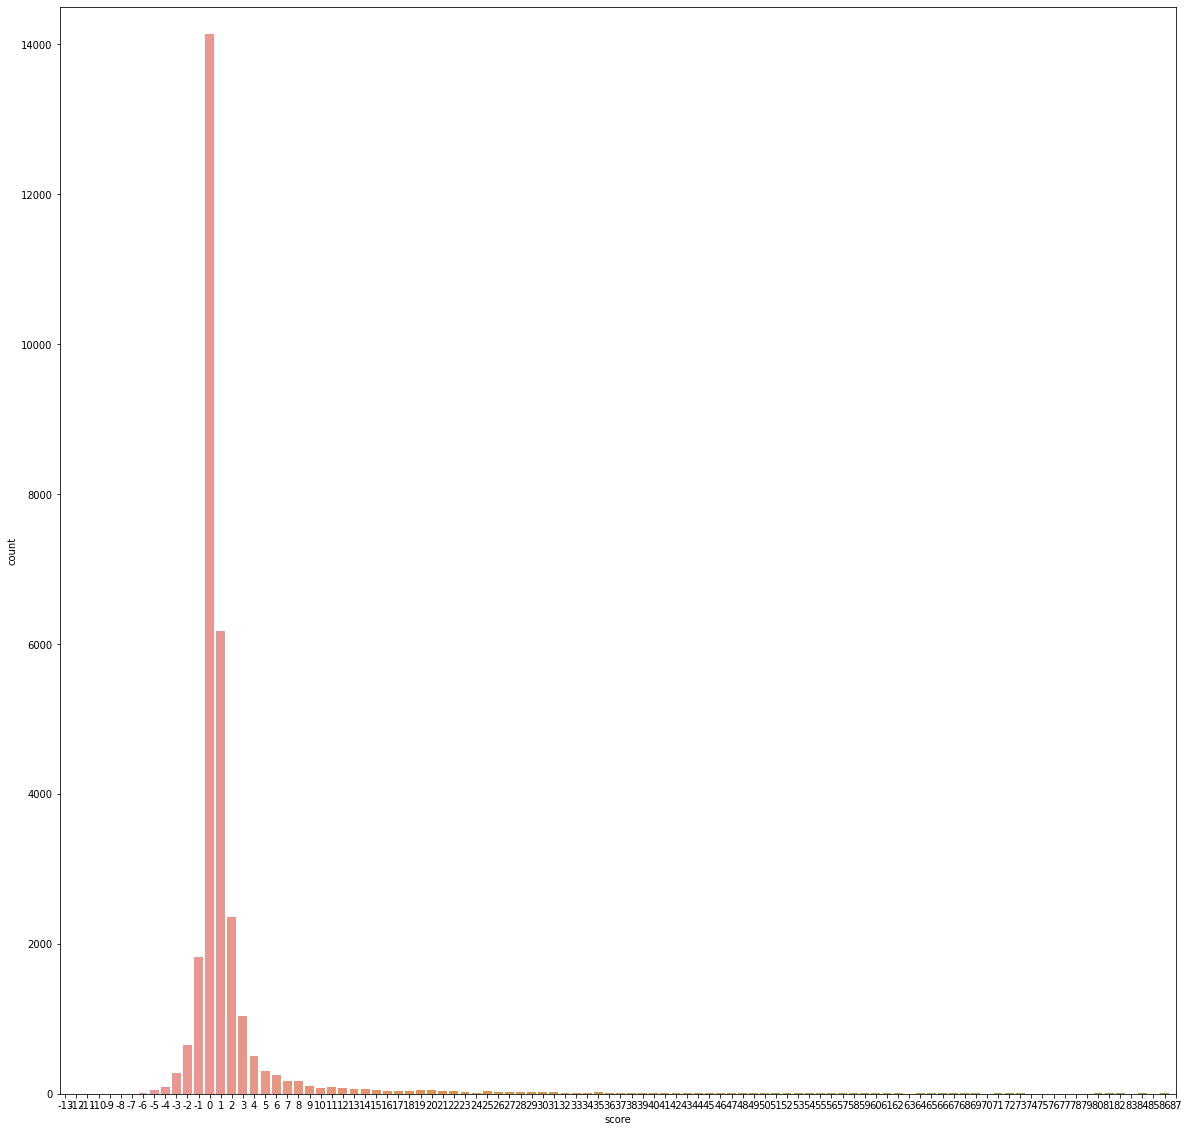

In [7]:
#### Histogram of distribution of outcome column "score"

f, ax = plt.subplots(figsize=(20,20))
sns.countplot(x='score', data=stackoverflow)
plt.xlim(None, 100) 
plt.ylim(0, 14500) 
plt.show()

In [37]:
### Cleaning the text

stopwords = nltk.corpus.stopwords.words('english')

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [28]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
print(spacy_stopwords)

{'therefore', 'move', 'whom', 'myself', 'whoever', 'beside', 'moreover', 'several', 'between', 'during', 'front', 'had', '’m', 'if', 'six', 'alone', 'someone', 'very', 'his', 'seems', 'another', 'an', 'everyone', 'nine', 'by', 'first', 'seem', 'among', 'whence', 'along', 'besides', 'somewhere', 'them', 'hence', '‘ve', 'serious', 'bottom', 'yet', 'anyway', 'also', 'were', 'themselves', 'via', 'less', 'eight', 'just', 'no', 'throughout', 'as', 'why', 'please', 'even', 'towards', 'afterwards', 'the', 'within', 'because', 'could', 'formerly', 'put', 'former', 'than', 'often', 'nowhere', 'nothing', 'herself', "n't", '‘re', 'noone', 'name', 'becoming', 'thru', 'some', 'that', 'further', 'otherwise', 'latterly', 'using', 'be', 'thus', 'at', '’ve', 'due', 'anything', 'four', 'fifteen', "'ll", '’re', 'to', 'elsewhere', 'regarding', 'only', 'one', 'whenever', 'since', 'anyone', 'empty', 'something', 'seeming', 'each', 'did', 'mostly', 'part', 'n’t', 'until', 'around', 'last', 'hundred', 'where',

In [32]:
### Verify that spaCy was installed and that models and data were successfully downloaded

nlp = spacy.load('en_core_web_sm')

### Prepare lemmatizer
lemmatizer = WordNetLemmatizer()

In [38]:
# Get rid of extras, and of code snippets split, and join 

def cleaner(x):
    x = re.sub(r'<code>.*?</code>', '', x.lower())
    x = re.sub(r'<p>', '', x)
    x = re.sub('[^a-z\s]', '', x)
    x = [w for w in x.split() if w not in stopwords]
    x = [lemmatizer.lemmatize(w) for w in x]
    return ' '.join(x)

In [39]:
stackoverflow['answer_text_clean'] = stackoverflow['answer_text'].apply(cleaner)

In [48]:
stackoverflow['answer_text_clean'].head()

0    replace linep precodenavigatorpushcontext mate...
1    anyone run solved changing single quote requir...
2    id attribute need unique make id loop uniquep ...
3    precodeselect id tocharmarkupdate day dayofwee...
4    need test stream emafterem trying read itp pre...
Name: answer_text_nocode, dtype: object

In [54]:
### Separating target and text columns

non_text_cols = ['Unnamed: 0', 'Unnamed: 0.1', 'question_id', 'question_id_check', 'comment_count', 'creation_date', 'favorite_count', 'view_count']
target_col = ['score']
text_cols   = [x for x in stackoverflow if x not in target_col + non_text_cols]

In [53]:
#### Apply function cleaner() to clean text columns only
df_text_cols = stackoverflow.apply(lambda x: cleaner(x) if x.name in [text_cols] else x)

### does not work because each one needs to be saved


### new code for applying cleaning / preprocessing to all text columns

for var_name in text_cols:
    new_var = "%s_%s" % (var_name, "clean")
    stackoverflow[new_var] = stackoverflow[var_name].apply(cleaner)

In [55]:
text_cols_clean = ['question_title_clean', 'question_text_clean', 'answer_text_clean', 'tags_clean']

stackoverflow[text_cols_clean] = stackoverflow[text_cols].apply(lambda x: x.cleaner)

AttributeError: 'Series' object has no attribute 'cleaner'

In [35]:
# code for making pipeline?

# https://towardsdatascience.com/turbo-charge-your-spacy-nlp-pipeline-551435b664ad

# https://realpython.com/natural-language-processing-spacy-python/

In [39]:
### To Do

#### HELP WITH
# Fix cleaner function 
# Apply cleaner function to multiple text cols
# Figure out no. of switches from code to explanation
# Categorize outcome

# extract if answer has code yes / no
# do this step first to see if code existence matters, then possibly more complex counting of code-explanation switches

# make outcome into category
# extract tags into separate columns
# count length of answer (number of words)


In [37]:
### possibly useful for later

lemma_list = []
for token in tokens:
    if token.is_stop is False:
        token_preprocessed = preprocessor(token.lemma_)
        if token_preprocessed != '':
             lemma_list.append(token_preprocessed)
lemma_list

[]

In [33]:
tokens = []
lemma = []

for doc in nlp.pipe(stackoverflow['answer_text_nocode'].astype('unicode').values, batch_size=50, n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)

stackoverflow['answer_text_tokens'] = tokens
stackoverflow['answer_text_lemma'] = lemma

KeyError: 'answer_text_nocode'